### Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных
#### Домашнее задание. Задача 1
#### Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150 Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
#### Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
vibor_ka = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [3]:
my_mean = vibor_ka.sum() / len(vibor_ka)
chislitel = ((vibor_ka - vibor_ka.mean())**2).sum()
my_std = np.sqrt(chislitel / len(vibor_ka))
my_var0 = chislitel / len(vibor_ka)
my_var1 = chislitel / (len(vibor_ka) - 1)
    
print(f'Ручной подсчет среднего арифметического значения {my_mean}, Подсчет при помощи функции {vibor_ka.mean()}')
print(f'Ручной подсчет среднего квадратичного отклонения {my_std}, Подсчет при помощи функции {vibor_ka.std()}')
print(f'Ручной подсчет смещенной оценки дисперсии {my_var0}, Подсчет при помощи функции {vibor_ka.var(ddof=0)}')
print(f'Ручной подсчет несмещенной оценки дисперсии {my_var1}, Подсчет при помощи функции {vibor_ka.var(ddof=1)}')

Ручной подсчет среднего арифметического значения 65.3, Подсчет при помощи функции 65.3
Ручной подсчет среднего квадратичного отклонения 30.823854398825596, Подсчет при помощи функции 30.823854398825596
Ручной подсчет смещенной оценки дисперсии 950.11, Подсчет при помощи функции 950.11
Ручной подсчет несмещенной оценки дисперсии 1000.1157894736842, Подсчет при помощи функции 1000.1157894736842


#### Задача 2
#### Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.


In [4]:
import seaborn as sns

In [5]:
df_vibor_ka = pd.DataFrame(vibor_ka)
q1 = df_vibor_ka[0].quantile(0.25)
q3 = df_vibor_ka[0].quantile(0.75)
iqr = q3 - q1

print(f'Первый квантиль равен {q1}, второй квантиль равен {q3}')
print(f'Интерквартильное расстояние равно {q3 - q1}')

Первый квантиль равен 42.0, второй квантиль равен 81.0
Интерквартильное расстояние равно 39.0


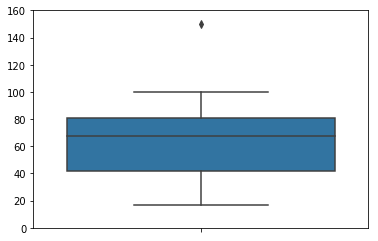

In [6]:
sns.boxplot(df_vibor_ka, orient='v')
plt.ylim(0, 160)
plt.show()

In [7]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [8]:
outliers = df_vibor_ka.loc[(df_vibor_ka[0] < boxplot_range[0]) | (df_vibor_ka[0] > boxplot_range[1])]

outliers[0].shape[0]
print(f'Выбросы: {outliers[0].value_counts()}')

Выбросы: 150    1
Name: 0, dtype: int64


#### Задача 3
#### Для распределения Пуассона с параметром a = 5 найти теоретические (т.е. используя закон распределения, а не выборку) мат. ожидание, моду и медиану.

Задание сложноватое для меня (Теорвер и матстат до этого не знал что такое вообще)
Покопавшись в интернете я нашел:
* Мат. ожидание = а = 5
* Если а целое число мода принимает два значения а - 1 и а, получается 4 и 5
* Если а целое число медиана = а = 5

In [9]:
a  = 5
# for i in range(100):
#     P_A = (a ** i) * (np.exp(-a)) / np.math.factorial(i)
#     print(P_A)


#### Задача 4
#### В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?
#### Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### A = B, A + B = C, значит
$P(B_1) = \frac{1}{4},  P(B_2) = \frac{1}{4},  P(B_3) = \frac{1}{2}$

#### Применим формулу полной вероятности
$$P(A) = {\frac{1}{4} \cdot 0.8} + \frac{1}{4} \cdot 0.7 + \frac{1}{2} \cdot 0.9 = 0.825$$

In [10]:
P_A = 1/4 * 0.8 + 1/4 * 0.7 + 1/2 * 0.9
P_A

0.825

Ответ на вопрос найдем по формуле Байеса:
$$P(B_i\:|\:A) = \frac{P(B_i) \cdot P(A\:|\:B_i)}{P(A)}$$

In [11]:
P_B_a_A = 1/4 * 0.8 / 0.825
P_B_a_A

0.24242424242424246

In [12]:
P_B_b_A = 1/4 * 0.7 / 0.825
P_B_b_A

0.21212121212121213

In [13]:
P_B_c_A = 1/2 * 0.9 / 0.825
P_B_c_A

0.5454545454545455

In [14]:
print(f'Вероятность того, что студент учится на факультете A: {P_B_a_A}')
print(f'Вероятность того, что студент учится на факультете B: {P_B_b_A}')
print(f'Вероятность того, что студент учится на факультете C: {P_B_c_A}')

Вероятность того, что студент учится на факультете A: 0.24242424242424246
Вероятность того, что студент учится на факультете B: 0.21212121212121213
Вероятность того, что студент учится на факультете C: 0.5454545454545455
